In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [21]:
population_df=pd.read_excel('../data/raw/population.xlsx',sheet_name='Table 1')
population = population_df.loc[8:2461]
pop_drop = population.dropna(axis='columns',how = 'all')
pop_drop.to_csv('../data/raw/population_2.csv', encoding='utf-8')

In [22]:
population=pd.read_csv('../data/raw/population_2.csv',header=0,names=['S/T code','S/T name', 'GCCSA code', 'GCCSA name',\
                                                                      'SA4 code', 'SA4 name', 'SA3 code', 'SA3 name', 'SA2 code',\
                                                                      'SA2 name', '2001','2002', '2003','2004', '2005','2006',
                                                                      '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',\
                                                                      '2016','2017','2018', '2019','2020','2021','change 2011-2021 number','change 2011-2021 %',\
                                                                      'Area km2','population density 2021(persons/km2)'])
VIC_population = population.loc[population['S/T name']=='Victoria']
select_population = VIC_population.loc[:, ['S/T name', 'SA2 name', '2001','2002', '2003','2004', '2005','2006',\
                                           '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',\
                                           '2016','2017','2018', '2019','2020','2021','change 2011-2021 number','change 2011-2021 %',\
                                           'Area km2','population density 2021(persons/km2)']] 

In [23]:
postcode_SA2 = pd.read_csv('../data/raw/postcode_info.csv')
attribute = postcode_SA2.loc[:,['Postcode','Longitude','Latitude','SA2 NAME 2016']]
drop_dup = attribute.drop_duplicates(subset=['Postcode'])
drop_dup = drop_dup.drop_duplicates(subset=['Longitude','Latitude'])
rename = drop_dup.rename(columns={'SA2 NAME 2016':'SA2 name'})

In [24]:
merge_data = pd.DataFrame(pd.merge(rename, select_population, on='SA2 name', how='inner'))

In [25]:
merge_data['change 2011-2021 %'] = merge_data['change 2011-2021 %']/100

In [26]:
merge_data['average change %'] = (merge_data['2002']/merge_data['2001']+merge_data['2003']/merge_data['2002']+merge_data['2004']/merge_data['2003']\
                                  +merge_data['2005']/merge_data['2004']+merge_data['2006']/merge_data['2005']+merge_data['2007']/merge_data['2006']\
                                  +merge_data['2008']/merge_data['2007']+merge_data['2009']/merge_data['2008']+merge_data['2010']/merge_data['2009']\
                                  +merge_data['2011']/merge_data['2010']+merge_data['2012']/merge_data['2011']+merge_data['2013']/merge_data['2012']\
                                  +merge_data['2014']/merge_data['2013']+merge_data['2015']/merge_data['2014']+merge_data['2016']/merge_data['2015']\
                                  +merge_data['2017']/merge_data['2016']+merge_data['2018']/merge_data['2017']+merge_data['2019']/merge_data['2018']\
                                  +merge_data['2020']/merge_data['2019']+merge_data['2021']/merge_data['2020'])/20

In [27]:
merge_data["2022"]=(merge_data["2021"]*merge_data["average change %"]).round()
merge_data["2023"]=(merge_data["2022"]*merge_data["average change %"]).round()
merge_data["2024"]=(merge_data["2023"]*merge_data["average change %"]).round()

In [28]:
merge_data

,Postcode,Longitude,Latitude,SA2 name,S/T name,2001,2002,2003,2004,2005,...,2020,2021,change 2011-2021 number,change 2011-2021 %,Area km2,population density 2021(persons/km2),average change %,2022,2023,2024
0,3002,144.982207,-37.818517,East Melbourne,Victoria,3731,3859,4243,4460,4495,...,5378,4962,-276,-0.053,2.9,1711.2,1.014927,5036.0,5111.0,5187.0
1,3005,144.950858,-37.824608,Docklands,Victoria,154,926,1913,3089,3779,...,16678,15942,9746,1.573,2.4,6522.9,1.422278,22674.0,32249.0,45867.0
2,3008,144.948039,-37.814719,Docklands,Victoria,154,926,1913,3089,3779,...,16678,15942,9746,1.573,2.4,6522.9,1.422278,22674.0,32249.0,45867.0
3,3010,144.961351,-37.796152,Parkville,Victoria,5332,5327,5253,5201,5157,...,8321,7446,895,0.137,4.0,1838.9,1.017541,7577.0,7710.0,7845.0
4,3050,144.954581,-37.800324,Parkville,Victoria,5332,5327,5253,5201,5157,...,8321,7446,895,0.137,4.0,1838.9,1.017541,7577.0,7710.0,7845.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587,3990,145.501279,-38.455399,Wonthaggi - Inverloch,Victoria,17647,17801,17956,18117,18250,...,25631,26723,6327,0.310,728.8,36.7,1.021019,27285.0,27859.0,28445.0
588,3991,145.466781,-38.483041,Wonthaggi - Inverloch,Victoria,17647,17801,17956,18117,18250,...,25631,26723,6327,0.310,728.8,36.7,1.021019,27285.0,27859.0,28445.0
589,3992,145.534315,-38.569135,Wonthaggi - Inverloch,Victoria,17647,17801,17956,18117,18250,...,25631,26723,6327,0.310,728.8,36.7,1.021019,27285.0,27859.0,28445.0
590,3995,145.630713,-38.578071,Wonthaggi - Inverloch,Victoria,17647,17801,17956,18117,18250,...,25631,26723,6327,0.310,728.8,36.7,1.021019,27285.0,27859.0,28445.0


In [33]:
lines = []
code = []

for i in range(len(merge_data)):
    code.append((merge_data["Postcode"])[i])
    l = [(merge_data["2018"])[i], (merge_data["2019"])[i], (merge_data["2020"])[i], (merge_data["2021"])[i], (merge_data["2022"])[i], (merge_data["2023"])[i], (merge_data["2024"])[i]]
    lines.append(l)
lines

[[5409, 5413, 5378, 4962, 5036.0, 5111.0, 5187.0],
 [15439, 16375, 16678, 15942, 22674.0, 32249.0, 45867.0],
 [15439, 16375, 16678, 15942, 22674.0, 32249.0, 45867.0],
 [8243, 8294, 8321, 7446, 7577.0, 7710.0, 7845.0],
 [8243, 8294, 8321, 7446, 7577.0, 7710.0, 7845.0],
 [8243, 8294, 8321, 7446, 7577.0, 7710.0, 7845.0],
 [17891, 18037, 18068, 17420, 17785.0, 18158.0, 18539.0],
 [19882, 19900, 19613, 18779, 18892.0, 19006.0, 19120.0],
 [15980, 16077, 16048, 15653, 15826.0, 16001.0, 16178.0],
 [18961, 19243, 19389, 18985, 19229.0, 19476.0, 19726.0],
 [16642, 16777, 16635, 16074, 16183.0, 16293.0, 16404.0],
 [13645, 13845, 13857, 13652, 13728.0, 13805.0, 13882.0],
 [19686, 19792, 19876, 19361, 19765.0, 20178.0, 20599.0],
 [8224, 8178, 8075, 7595, 7648.0, 7701.0, 7755.0],
 [8224, 8178, 8075, 7595, 7648.0, 7701.0, 7755.0],
 [14612, 14639, 14461, 14081, 14011.0, 13941.0, 13872.0],
 [5395, 5542, 5733, 5855, 6156.0, 6473.0, 6806.0],
 [7540, 10296, 13272, 17836, 20236.0, 22959.0, 26048.0],
 [7540

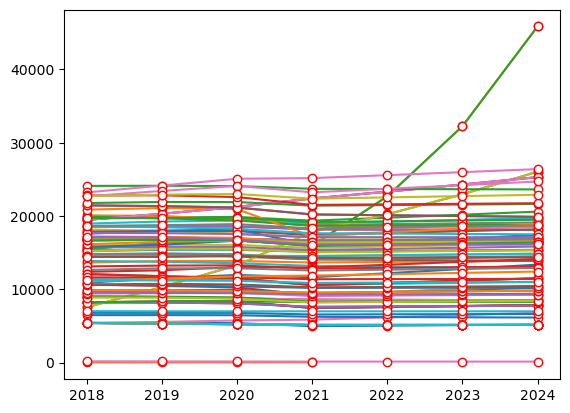

In [38]:
year = ['2018', '2019', '2020', '2021', '2022', '2023', '2024']
for i in range(100):
    plt.plot(year, lines[i], marker='o', mec='r', mfc='w',label= code[i])

In [10]:
merge_data.to_csv('../data/curated/population_postcode_SA2.csv')

In [21]:
long_table=merge_data.melt(id_vars=["Postcode"],var_name="Year",value_name="Population") 
long_table=long_table.sort_values(by=["Postcode","Year","Population"],ascending=True) 
select_year = long_table.loc[(long_table['Year']=='2022')|(long_table['Year']=='2023')|(long_table['Year']=='2024')]
select_year

,Postcode,Year,Population
17760,3002,2022,5036.0
18352,3002,2023,5111.0
18944,3002,2024,5187.0
17761,3005,2022,22674.0
18353,3005,2023,32249.0
...,...,...,...
18518,8004,2023,16448.0
19110,8004,2024,16665.0
18036,8010,2022,11039.0
18628,8010,2023,11250.0


In [77]:
len(select_year)

1776

In [76]:
len(merge_data)

592

In [74]:
select_year.loc[select_year['Postcode']==3002]

,Postcode,Year,Population
17760,3002,2022,5036.0
18352,3002,2023,5111.0
18944,3002,2024,5187.0


In [ ]:
for i in len(select_year):
    if select_year.loc[select_year['Postcode']==select_year['Postcode']]

In [69]:
select_year.iloc[6:9]

,Postcode,Year,Population
17762,3008,2022,22674.0
18354,3008,2023,32249.0
18946,3008,2024,45867.0


<function matplotlib.pyplot.show(close=None, block=None)>

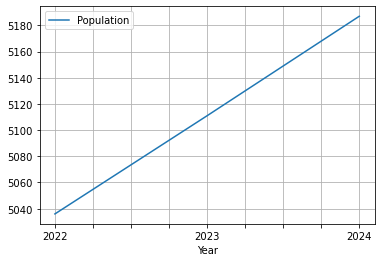

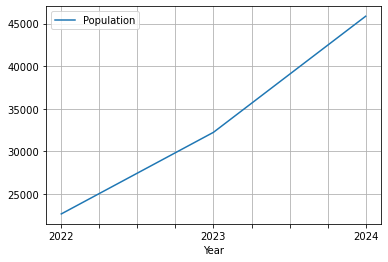

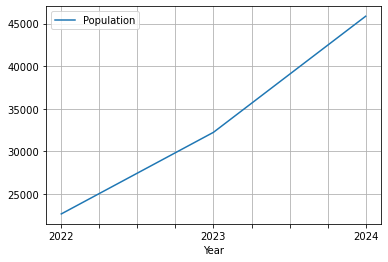

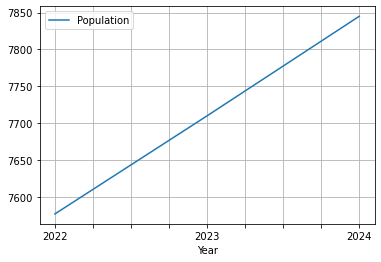

In [70]:
import matplotlib.pyplot as plt
import numpy as np
select_year.head(3).plot(x='Year', y='Population', kind='line', grid=True)
plt.show
select_year.iloc[3:6].plot(x='Year', y='Population', kind='line', grid=True)
plt.show
select_year.iloc[6:9].plot(x='Year', y='Population', kind='line', grid=True)
select_year.iloc[9:12].plot(x='Year', y='Population', kind='line', grid=True)
plt.show

ValueError: x and y must have same first dimension, but have shapes (3,) and (592, 3)

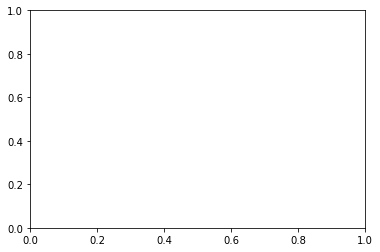

In [53]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot([2022,2023,2024],merge_data[['2022','2023','2024']], kind='line', grid=True)
plt.show

In [ ]:

postcode=merge_data.loc[:,'Postcode']
pop_2022=merge_data.loc[:,'2022']
pop_2023=merge_data.loc[:,'2023']
pop_2024=merge_data.loc[:,'2024']
plt.figure(figsize=(15, 8), dpi=80)
